
# **Lab Assignment 6**

**Name :-** Jash Shah

**Roll No. :-** 202201016

**Course :-** IT462 Exploratory Data Analysis

##**Inporting the Libraries**


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
from sklearn.compose import ColumnTransformer

In [60]:
data = pd.read_csv("/content/Loan_train.csv")
test_data = pd.read_csv("/content/Loan_test.csv")
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [62]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [63]:
numeric_columns = ["id", "person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "loan_status"]
outlier_numeric_columns = ["person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
categor_columns = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
ordinal_columns = ["loan_grade"]
nominal_columns = ["person_home_ownership", "loan_intent", "cb_person_default_on_file"]

Encoding the data

In [69]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']
label_encoder = LabelEncoder()
# Define categorical features for encoding
ordinal_features = ['person_home_ownership', 'cb_person_default_on_file', 'loan_grade']
one_hot_features = ['loan_intent']
# Create Column Transformer for encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_features),
        ('onehot', OneHotEncoder(), one_hot_features)
    ],
    remainder='passthrough'  # Keep the rest of the features as is
)
# Preprocess the data (transform)
X_transformed = column_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.20, random_state=42)
X_train = pd.DataFrame(X_train, columns=column_transformer.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=column_transformer.get_feature_names_out())
Y_train = pd.DataFrame(y_train, columns=['loan_status'])
Y_test = pd.DataFrame(y_test, columns=['loan_status'])


Removing the Outlier from the numerical coloums

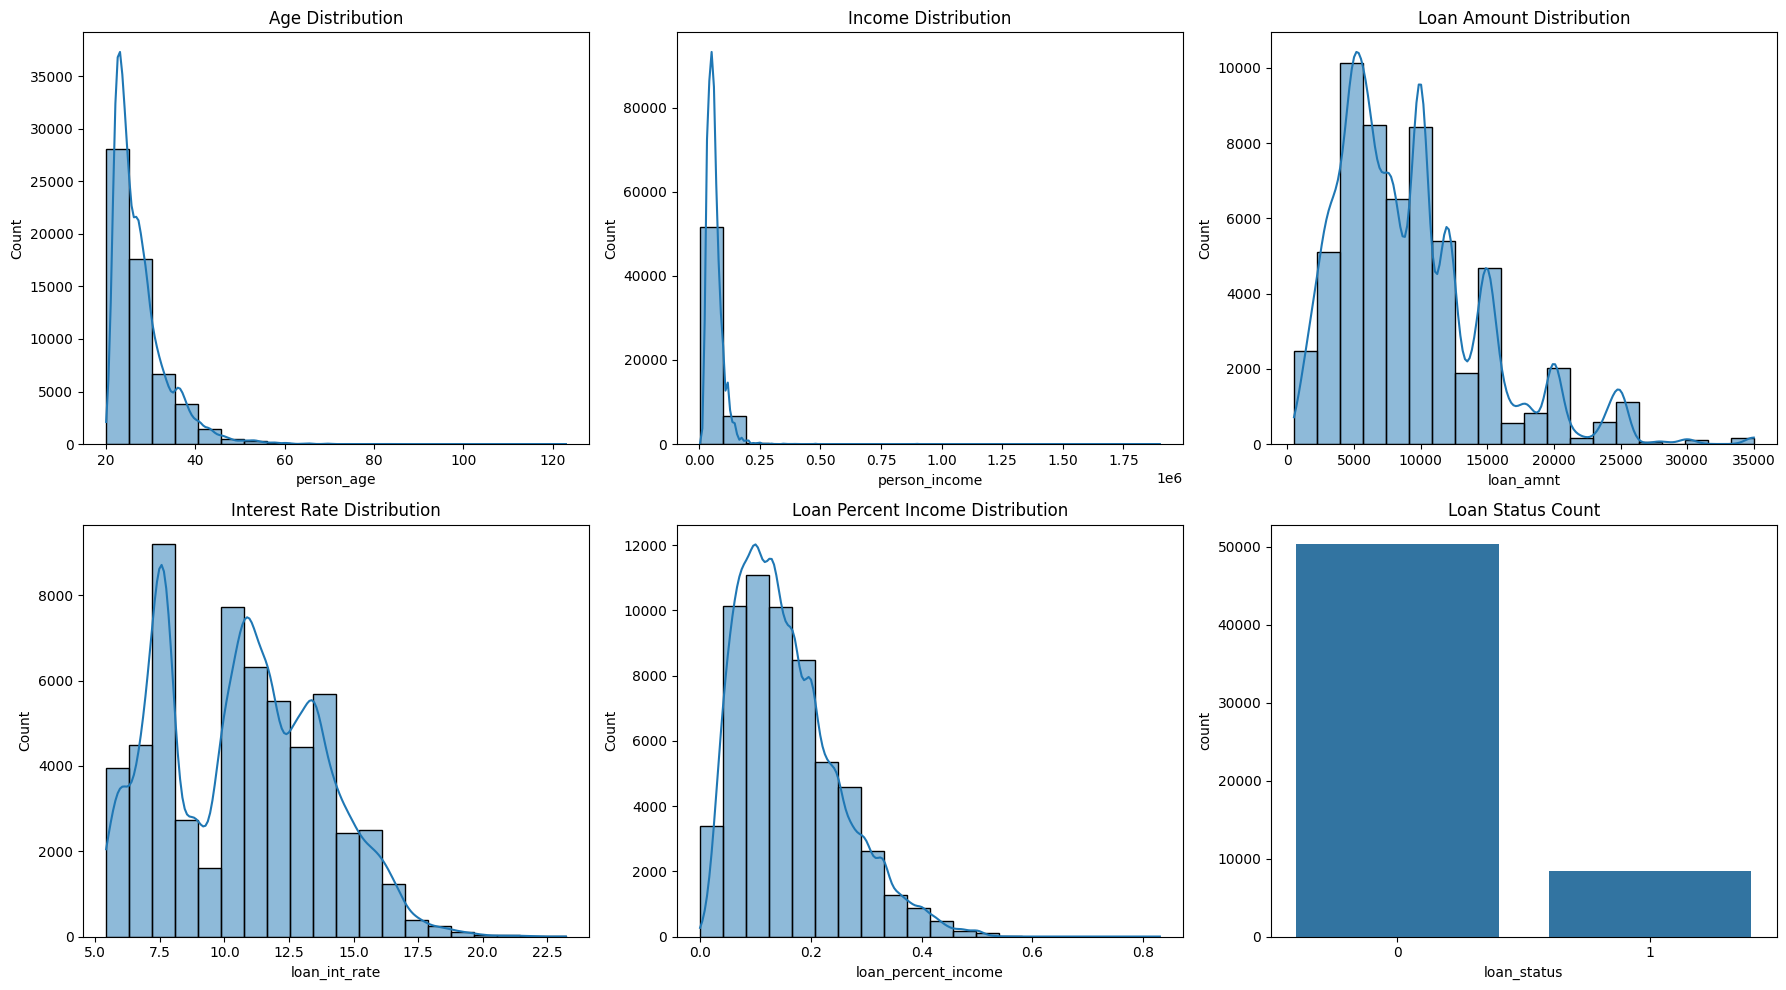

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(data['person_age'], bins=20, kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(data['person_income'], bins=20, kde=True, ax=axes[0, 1]).set_title('Income Distribution')
sns.histplot(data['loan_amnt'], bins=20, kde=True, ax=axes[0, 2]).set_title('Loan Amount Distribution')
sns.histplot(data['loan_int_rate'], bins=20, kde=True, ax=axes[1, 0]).set_title('Interest Rate Distribution')
sns.histplot(data['loan_percent_income'], bins=20, kde=True, ax=axes[1, 1]).set_title('Loan Percent Income Distribution')
sns.countplot(x=data['loan_status'], ax=axes[1, 2]).set_title('Loan Status Count')
plt.tight_layout()
plt.show()

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = XGBClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")
if len(set(y_test)) == 2:
    # Get probability predictions for AUC score (for binary classification)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc*100}")
else:
    # For multiclass AUC, provide probabilities for each class
    y_proba = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    print(f"AUC Score (Multiclass): {auc*100}")

Accuracy: 95.26813880126183
AUC Score: 95.52597034303386
